# Python - Final
## Shahin Mammadov

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mp

## Part 1
### Question 1

In [2]:
data = pd.read_csv("HR_data.csv")

In [3]:
data.head()

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Age,left
0,1,0.38,0.53,2,157,3,0,0,sales,low,23.0,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,34.0,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,19.0,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,35.0,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,45.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Age                    158 non-null    float64
 11  left                   14999 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


In [5]:
pd.isnull(data).sum()

Id                           0
satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
promotion_last_5years        0
Department                   0
salary                       0
Age                      14841
left                         0
dtype: int64

In [6]:
data[data.duplicated()]

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Age,left


### Question 2

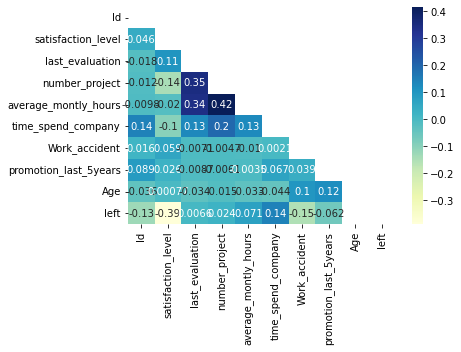

In [7]:
mask = np.triu(np.ones_like(data.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
mp.show()

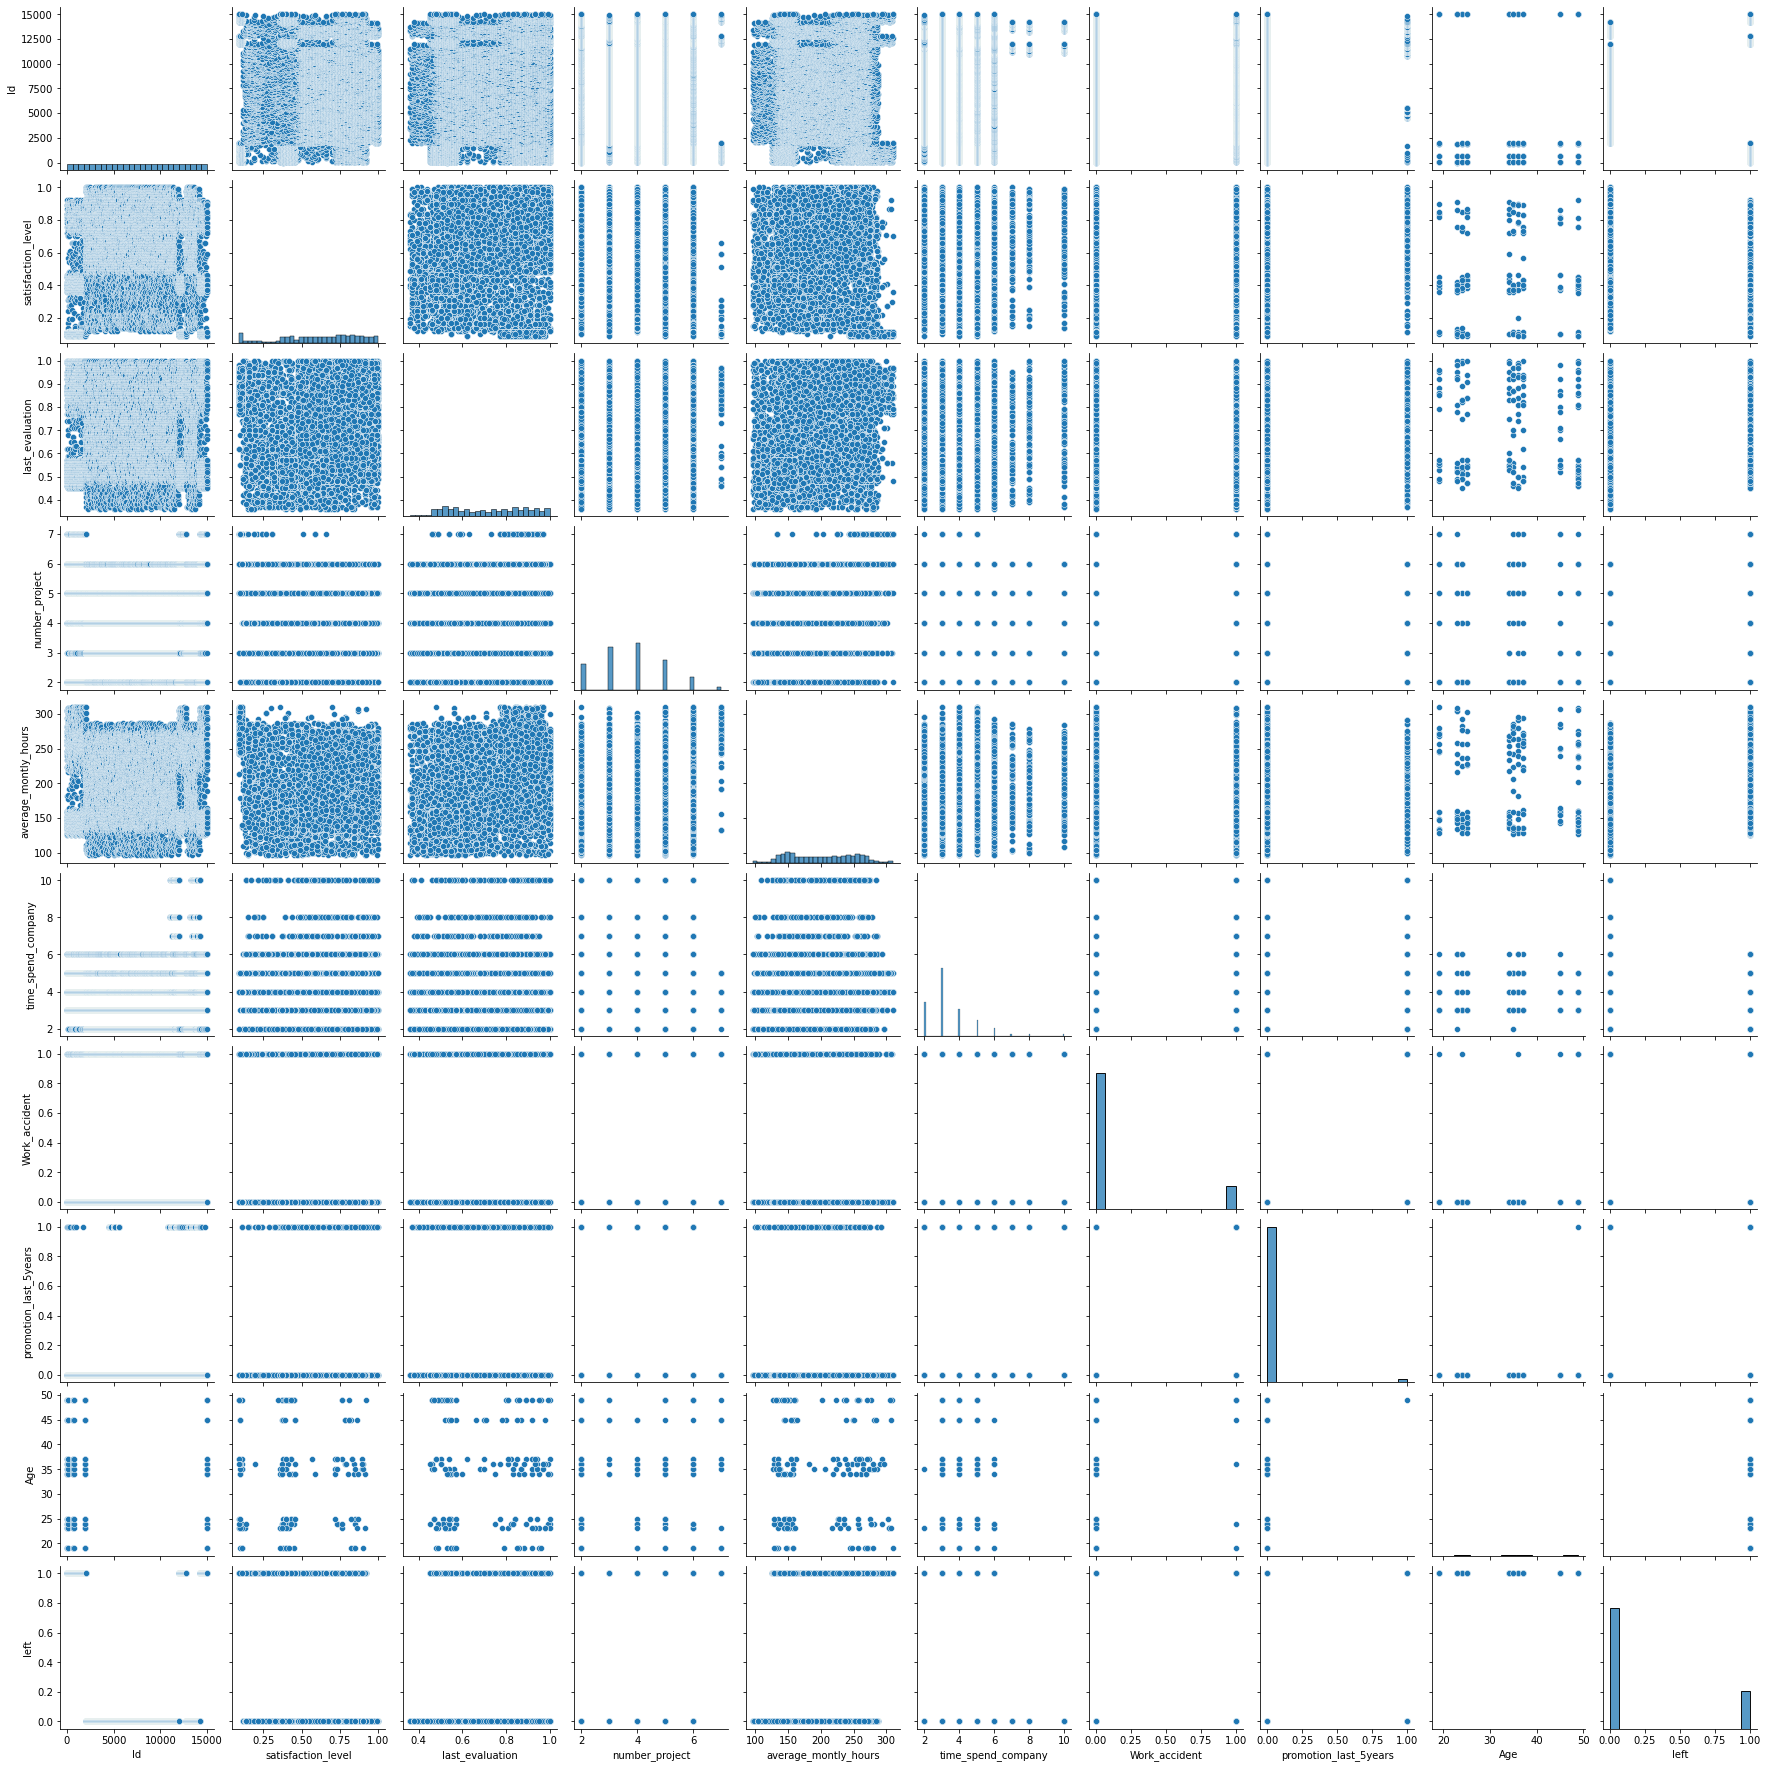

In [8]:
sns.pairplot(data)

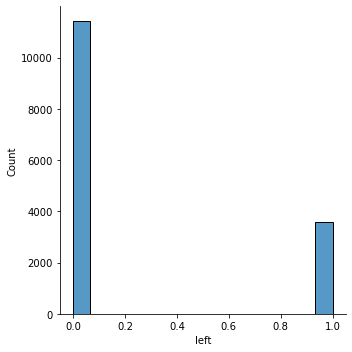

In [9]:
sns.displot(data.left)

### Question 3

Because age column has more than 14,000 null values, we will remove that column

In [10]:
data = data.drop(columns=['Age'])

In [11]:
data.head()

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


In [12]:
pd.isnull(data).sum()

Id                       0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Department               0
salary                   0
left                     0
dtype: int64

In [13]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

I will down sample the majority class

In [14]:
from sklearn.utils import resample
df_majority = data[data.left==0]
df_minority = data[data.left==1]

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=3571,     # to match minority class
                                 random_state=123) 

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.left.value_counts()

0    3571
1    3571
Name: left, dtype: int64

In [15]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_downsampled['Department']= label_encoder.fit_transform(df_downsampled['Department'])
df_downsampled['salary']= label_encoder.fit_transform(df_downsampled['salary'])
df_downsampled.head()

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
2253,2254,0.22,0.52,6,175,4,0,0,9,2,0
5734,5735,0.53,0.54,4,257,3,1,0,5,1,0
4907,4908,0.62,0.49,3,158,2,0,0,7,1,0
10949,10950,0.49,0.67,3,140,2,0,0,3,2,0
4835,4836,0.89,0.91,5,224,3,1,0,7,1,0


### Question 4

In [16]:
y = df_downsampled['left']
X = df_downsampled.drop(columns=['left'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
y_lr_pred = regressor.predict(X_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)

y_dtc_pred = dtc.predict(X_test)

In [21]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)

y_gnb_pred = gnb.predict(X_test)

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train)

y_xgb_pred = xgb.predict(X_test)

### Question 5

In [23]:
from sklearn import metrics

In [24]:
regressor.score(X_train, y_train)

0.2862926707045266

In [25]:
metrics.accuracy_score(y_test, y_xgb_pred)

0.9993002099370188

In [26]:
metrics.accuracy_score(y_test, y_dtc_pred)

0.9951014695591323

In [27]:
metrics.accuracy_score(y_test, y_gnb_pred)

0.8152554233729881

## Part 2

In [29]:
data = pd.read_csv("pop.csv")

In [30]:
data.head()

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.0,1952-01-01,2019-12-06
1,2019-12-06,156527.0,1952-02-01,2019-12-06
2,2019-12-06,156731.0,1952-03-01,2019-12-06
3,2019-12-06,156943.0,1952-04-01,2019-12-06
4,2019-12-06,157140.0,1952-05-01,2019-12-06


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  816 non-null    object 
 1   value           816 non-null    float64
 2   date            816 non-null    object 
 3   realtime_end    816 non-null    object 
dtypes: float64(1), object(3)
memory usage: 25.6+ KB


In [32]:
pd.isnull(data).sum()

realtime_start    0
value             0
date              0
realtime_end      0
dtype: int64

In [33]:
data[data.duplicated()]

,realtime_start,value,date,realtime_end


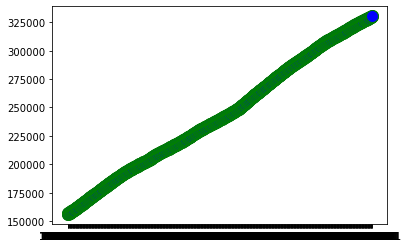

In [35]:
mp.plot(data.date, data.value, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

As seen above, we can say the growth is linear

In [36]:
data = data.drop(columns=['realtime_start', 'realtime_end'])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


In [39]:
data.columns = ['y', 'ds']

In [40]:
data.head()

,y,ds
0,156309.0,1952-01-01
1,156527.0,1952-02-01
2,156731.0,1952-03-01
3,156943.0,1952-04-01
4,157140.0,1952-05-01


In [42]:
from pandas import to_datetime

data['ds']= to_datetime(data['ds'])

In [46]:
from prophet import Prophet

m = Prophet()
m.fit(data)

11:29:34 - cmdstanpy - INFO - Chain [1] start processing
11:29:35 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
future = m.make_future_dataframe(periods=1500)

In [57]:
future.tail()

,ds
2311,2024-01-05
2312,2024-01-06
2313,2024-01-07
2314,2024-01-08
2315,2024-01-09


In [58]:
forecast = m.predict(future)

In [59]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2311,2024-01-05,340527.840265,339311.398274,341713.449815
2312,2024-01-06,340521.811742,339356.409452,341781.162524
2313,2024-01-07,340525.541339,339346.700289,341754.665499
2314,2024-01-08,340538.938674,339313.392649,341732.883536
2315,2024-01-09,340561.639740,339310.907822,341764.164879


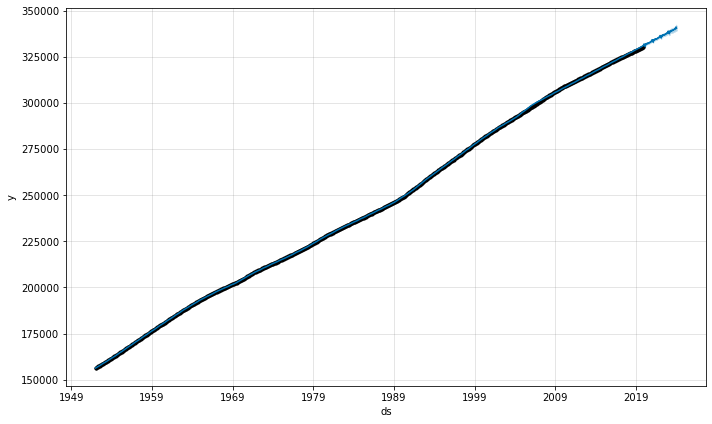

In [60]:
fig1 = m.plot(forecast)

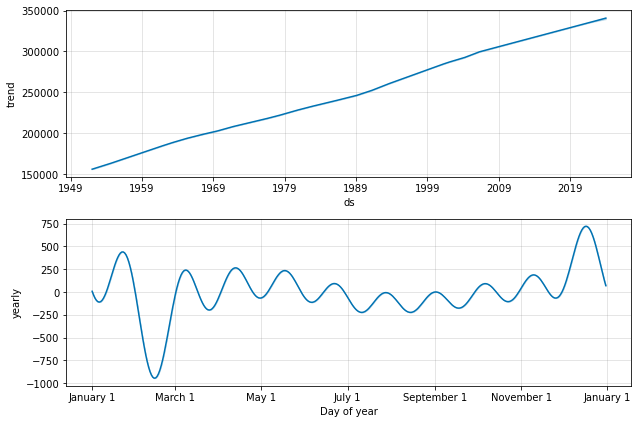

In [61]:
fig2 = m.plot_components(forecast)